<a href="https://colab.research.google.com/github/vongmaianh170196/statistical_data_analysis_utu/blob/main/Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from io import StringIO

data_lines = []
start_reading = False

with open('data.soft', 'r') as file:
    for line in file:
        if line.strip() == '!dataset_table_begin':
            start_reading = True
        elif start_reading:
            data_lines.append(line)

data_string = ''.join(data_lines)
data = pd.read_csv(StringIO(data_string), sep='\t')

probe_ids = pd.read_csv("51-probes.ids", header=None, names=["ID_REF"])
first_filtered_data = data[data["ID_REF"].isin(probe_ids["ID_REF"])]

subject_ids = [
    "GSM1068478",
    "GSM1068486",
    "GSM1068492",
    "GSM1068498",
    "GSM1068505",
    "GSM1068512",
    "GSM1068520",
    "GSM1068480",
    "GSM1068501",
    "GSM1068516",
    "GSM1068458",
    "GSM1068468",
    "GSM1068477",
    "GSM1068467",
    "GSM1068528",
    "GSM1068537",
    "GSM1068543",
    "GSM1068548",
    "GSM1068555",
    "GSM1068562"
]

probes_subjects = ["ID_REF"] + subject_ids

first_filtered_data = first_filtered_data[probes_subjects]

#print(first_filtered_data.head())

#1.a
mean_expression_by_subject = first_filtered_data.mean()
#print(mean_expression_by_subject)

#1.b
mean_of_probes = first_filtered_data.mean(axis=1)
first_filtered_data["mean_of_probes"] = mean_of_probes
#print(first_filtered_data.head())

# 1.c > do not get the idea of the question well
probes_greater_than_10 = first_filtered_data[first_filtered_data["mean_of_probes"] > 10.0]
corresponding_data = probes_greater_than_10[probes_subjects]

print("Number of probes with a mean greater than 10.0:", len(probes_greater_than_10))
print("\n")
print()



Number of probes with a mean greater than 10.0: 5




<ipython-input-10-61dd3a17c91f>:50: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_expression_by_subject = first_filtered_data.mean()
<ipython-input-10-61dd3a17c91f>:54: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_of_probes = first_filtered_data.mean(axis=1)


AttributeError: ignored

           ID_REF  GSM1068458  GSM1068459  GSM1068460  GSM1068461  GSM1068462  \
26   A_23_P100355     9.73450     9.82071    10.38230    10.43700    10.37030   
149  A_23_P101829     7.34121     8.00249     7.17964     7.53055     7.10362   
178  A_23_P102235    12.12020    12.31900    12.42870    12.23300    12.14920   
207  A_23_P102607     7.07051     6.91728     7.16459     6.19421     6.86695   
215  A_23_P102743     7.31329     6.38099     7.14409     6.72997     7.03673   

     GSM1068463  GSM1068464  GSM1068465  GSM1068466  ...  GSM1068556  \
26     10.59030    10.48990    10.76750    10.57110  ...    10.94870   
149     7.07410     6.69177     7.37524     7.49978  ...     7.18555   
178    12.22640    12.16290    12.19920    12.26940  ...    12.28210   
207     6.84001     7.34184     7.09113     6.87948  ...     7.20520   
215     6.75132     6.62888     6.63785     6.87825  ...     6.98354   

     GSM1068557  GSM1068558  GSM1068559  GSM1068560  GSM1068561  GSM1068562  \
2

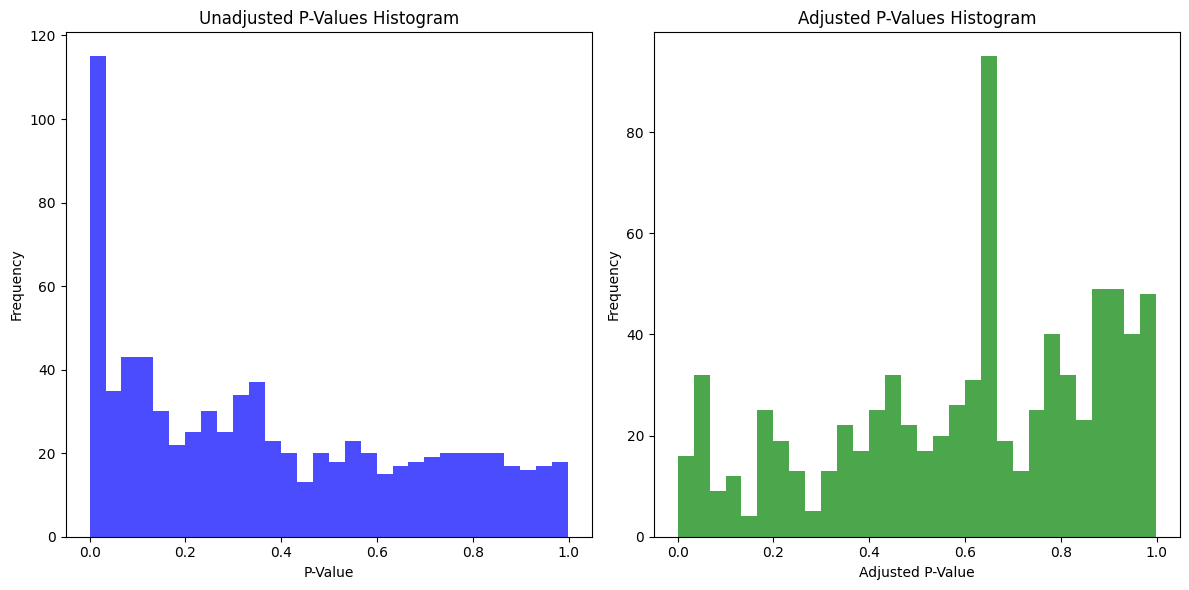



2.4.... Number of differentially expressed genes (i.e. statistically significant differences) at the false discovery rate of 0.05 is 33


           ID_REF  GSM1068458  GSM1068459  GSM1068460  GSM1068461  GSM1068462  \
26   A_23_P100355     9.73450     9.82071    10.38230    10.43700    10.37030   
149  A_23_P101829     7.34121     8.00249     7.17964     7.53055     7.10362   
178  A_23_P102235    12.12020    12.31900    12.42870    12.23300    12.14920   
207  A_23_P102607     7.07051     6.91728     7.16459     6.19421     6.86695   
215  A_23_P102743     7.31329     6.38099     7.14409     6.72997     7.03673   

     GSM1068463  GSM1068464  GSM1068465  GSM1068466  ...  GSM1068558  \
26     10.59030    10.48990    10.76750    10.57110  ...    10.21060   
149     7.07410     6.69177     7.37524     7.49978  ...     7.50311   
178    12.22640    12.16290    12.19920    12.26940  ...    12.29720   
207     6.84001     7.34184     7.09113     6.87948  ...     6.85812   
215     6.751

In [ ]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import multitest

data_lines = []
start_reading = False

with open('data.soft', 'r') as file:
    for line in file:
        if line.strip() == '!dataset_table_begin':
            start_reading = True
        elif start_reading:
            data_lines.append(line)

data_string = ''.join(data_lines)
data = pd.read_csv(StringIO(data_string), sep='\t')

probe_ids_52 = pd.read_csv("52-probes.ids", header=None, names=["ID_REF"])
second_filtered_data = data[data["ID_REF"].isin(probe_ids_52["ID_REF"])]

asthma_ids = [
    'GSM1068528', 'GSM1068529', 'GSM1068530', 'GSM1068531', 'GSM1068532',
    'GSM1068533', 'GSM1068534', 'GSM1068535', 'GSM1068536', 'GSM1068537',
    'GSM1068538', 'GSM1068539', 'GSM1068540', 'GSM1068541', 'GSM1068542',
    'GSM1068543', 'GSM1068544', 'GSM1068545', 'GSM1068546', 'GSM1068547',
    'GSM1068548', 'GSM1068549', 'GSM1068550', 'GSM1068551', 'GSM1068552',
    'GSM1068553', 'GSM1068554', 'GSM1068555', 'GSM1068556', 'GSM1068557',
    'GSM1068558', 'GSM1068559', 'GSM1068560', 'GSM1068561', 'GSM1068562',
    'GSM1068563', 'GSM1068564', 'GSM1068565'
]

control_ids = [
    'GSM1068458', 'GSM1068459', 'GSM1068460', 'GSM1068461', 'GSM1068462',
    'GSM1068463', 'GSM1068464', 'GSM1068465', 'GSM1068466', 'GSM1068467',
    'GSM1068468', 'GSM1068469', 'GSM1068470', 'GSM1068471', 'GSM1068472',
    'GSM1068473', 'GSM1068474', 'GSM1068475', 'GSM1068476', 'GSM1068477'
]

probes_control_asthma = ["ID_REF"] + control_ids + asthma_ids

second_filtered_data = second_filtered_data[probes_control_asthma]

print(second_filtered_data.head())


# 2.a > not sure how to do correctly
 #box_plot_data = second_filtered_data.drop('ID_REF', axis=1)
 #box_plot_data.plot.box(vert=False)

 #plt.xlabel("Gene Expression Levels")
 #plt.ylabel("Subjects (GSM IDs)")
 #plt.title("Box plot of gene expression levels for each subject")
 #plt.show()

#2.b
control_data = second_filtered_data[control_ids]
control_data = control_data.apply(pd.to_numeric, errors='coerce')

asthma_data = second_filtered_data[asthma_ids]
asthma_data = asthma_data.apply(pd.to_numeric, errors='coerce')

differential_genes = []
p_values = []
alpha = 0.05

for index, row in second_filtered_data.iterrows():
    control_values = control_data.loc[index].dropna()
    asthma_values = asthma_data.loc[index].dropna()

    if len(control_values) > 0 and len(asthma_values) > 0:
        t_stat, p_val = stats.ttest_ind(control_values, asthma_values)
        if p_val < alpha:
            differential_genes.append(index)
        p_values.append(p_val)

differential_genes_ids = second_filtered_data.loc[differential_genes, 'ID_REF']
print("2.2....\n")
print(differential_genes_ids.head(10))

#2.c
second_filtered_data['p-value'] = p_values
second_filtered_data['adjusted_p-value'] =  multitest.multipletests(p_values, method='fdr_bh')[1]
unadjusted_p_values = second_filtered_data['p-value']
adjusted_p_values = second_filtered_data['adjusted_p-value']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(unadjusted_p_values, bins=30, color='blue', alpha=0.7)
plt.title('Unadjusted P-Values Histogram')
plt.xlabel('P-Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(adjusted_p_values, bins=30, color='green', alpha=0.7)
plt.title('Adjusted P-Values Histogram')
plt.xlabel('Adjusted P-Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n")
#2.d
differential_genes = second_filtered_data[second_filtered_data['adjusted_p-value'] <= 0.05]
print("2.4.... Number of differentially expressed genes (i.e. statistically significant differences) at the false discovery rate of 0.05 is", len(differential_genes))

print("\n")
#2.e > do not get the idea of the question well
print(second_filtered_data.head())
sorted = second_filtered_data.sort_values(by='adjusted_p-value')
top_10_probes = sorted.head(10)
print("2.5....\n")
print(top_10_probes['ID_REF'])

2.3 The differences:
Unadjusted P-Values Histogram:

Unadjusted shows the distribution of p-values without any correction.

Adjusted p-values are obtained after applying a correction method to reduce the possibility of reporting false positives.

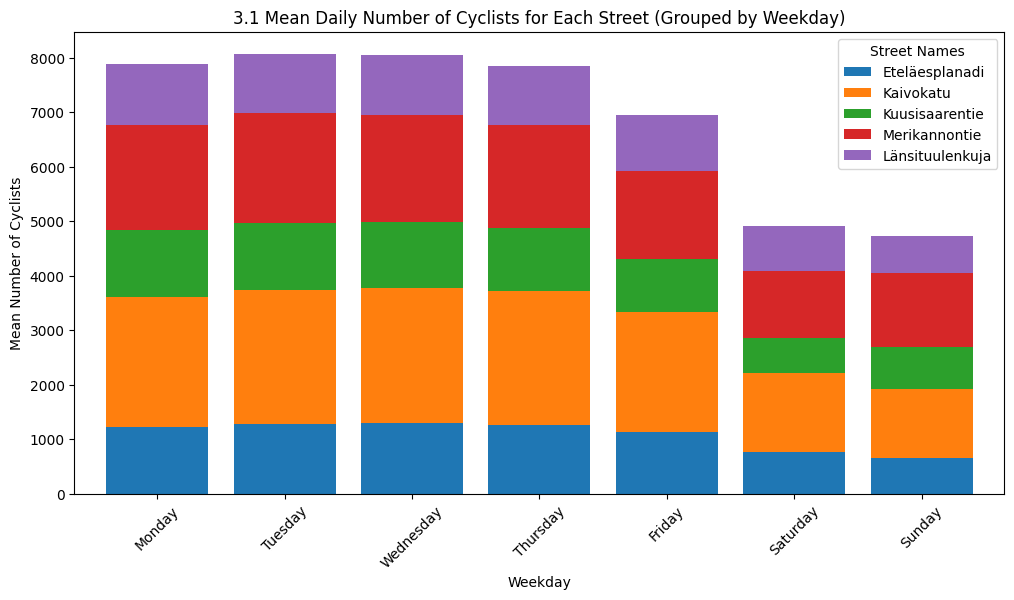

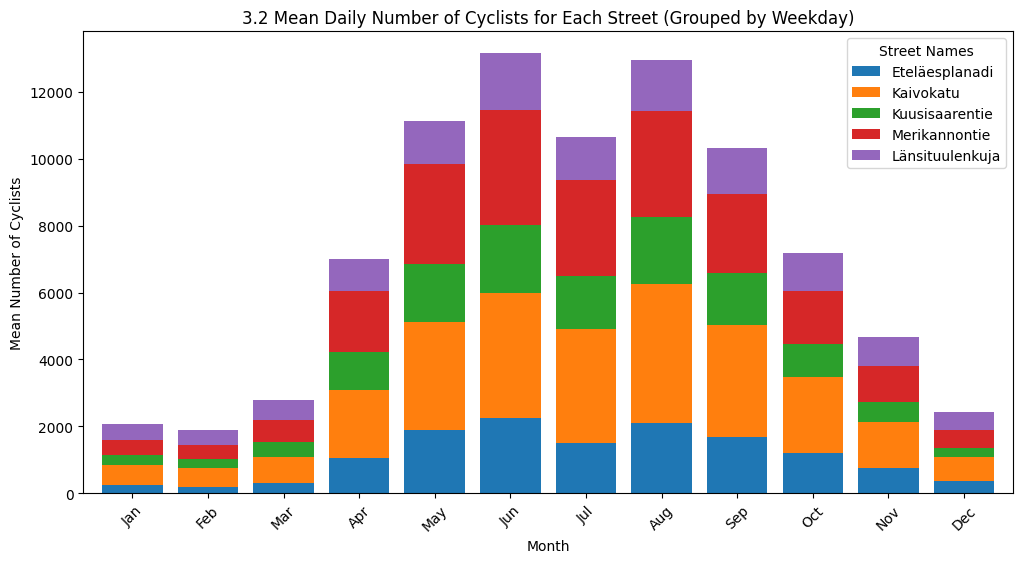

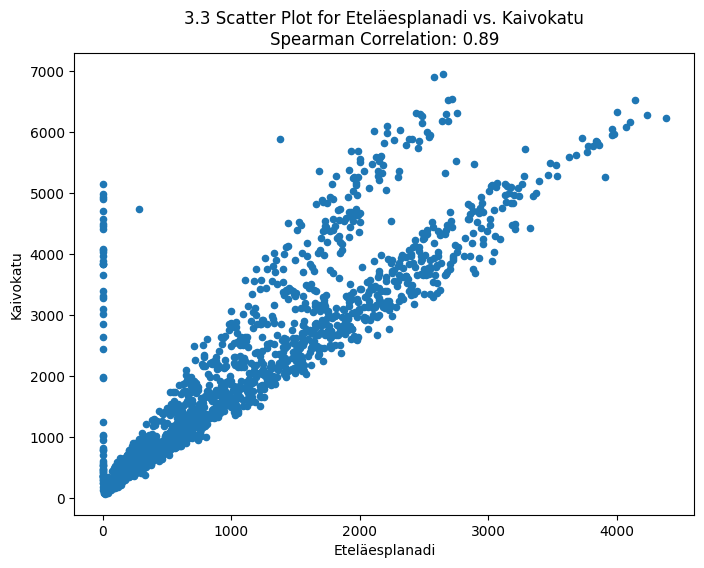

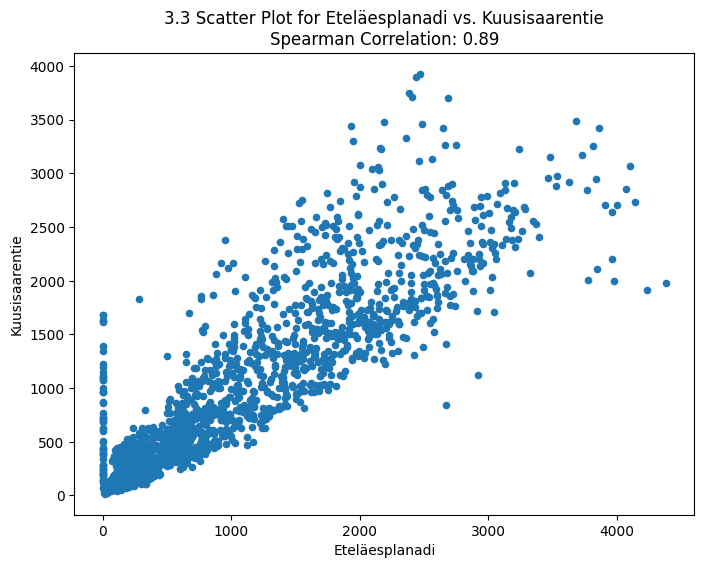

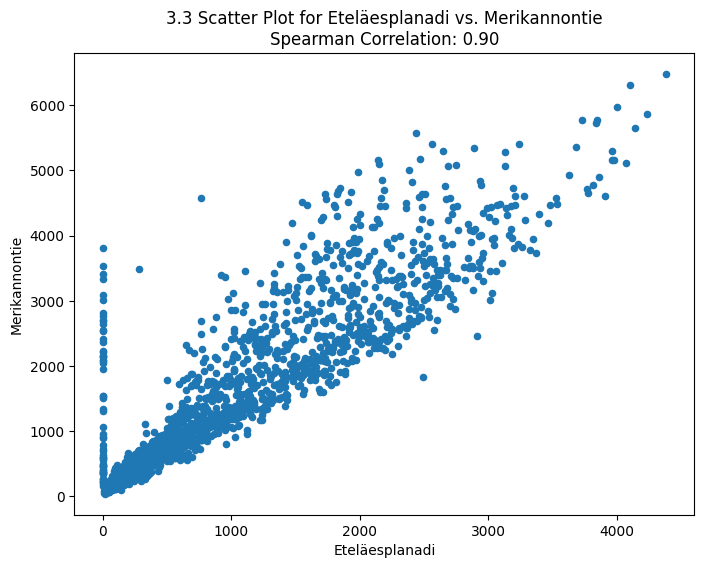

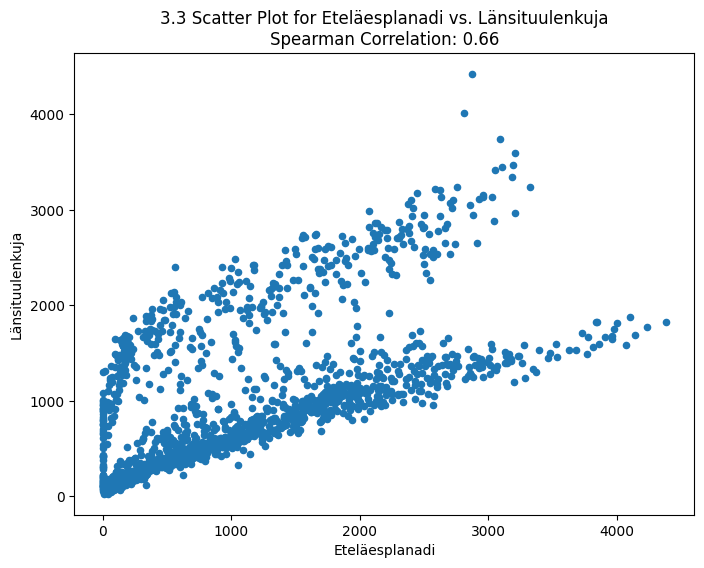

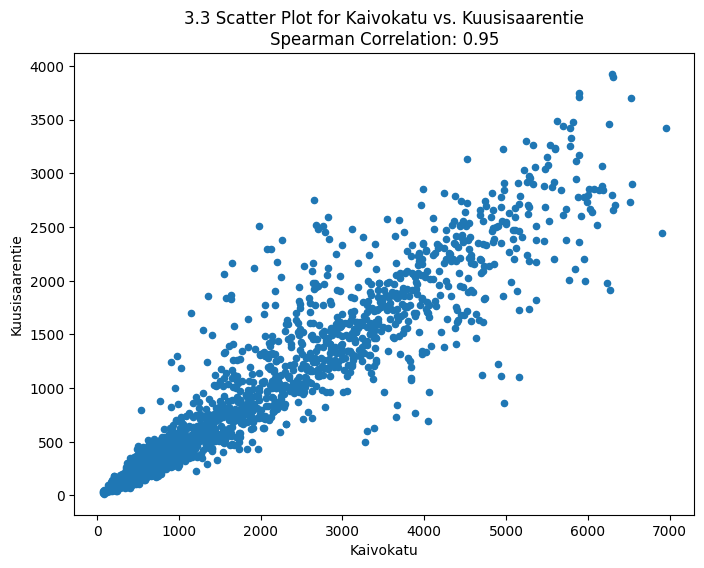

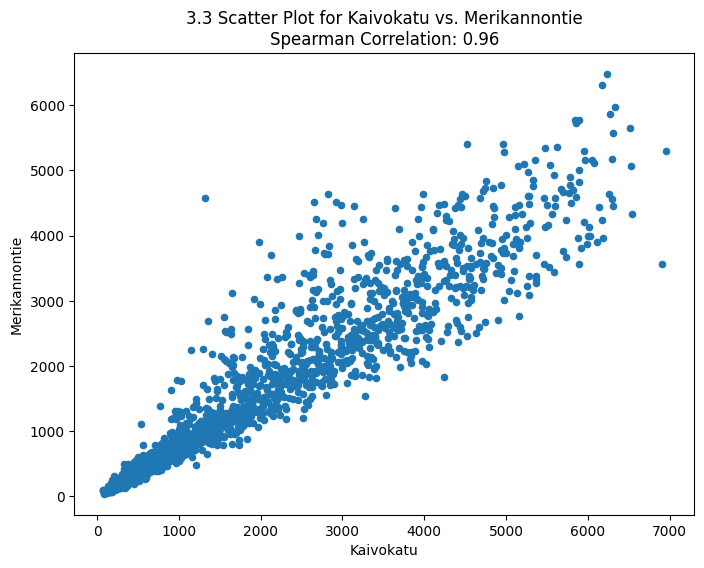

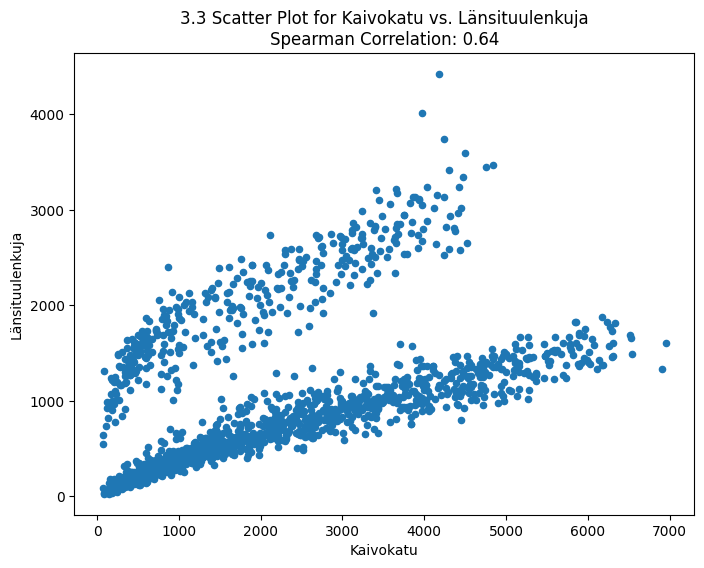

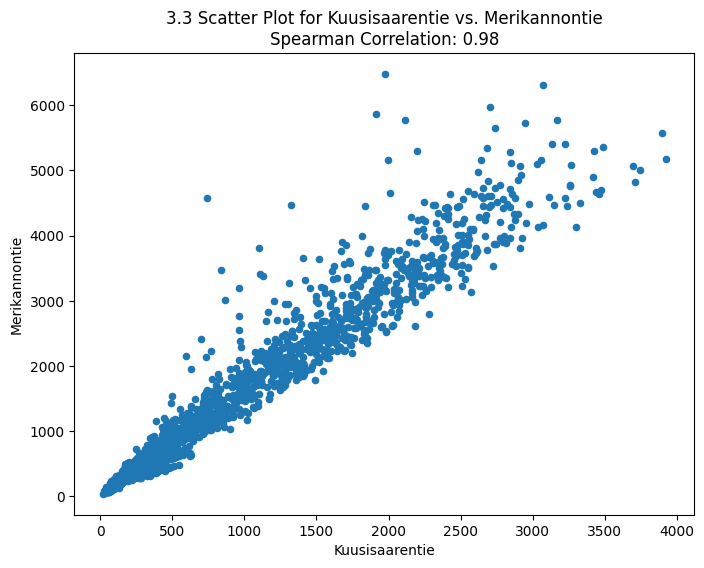

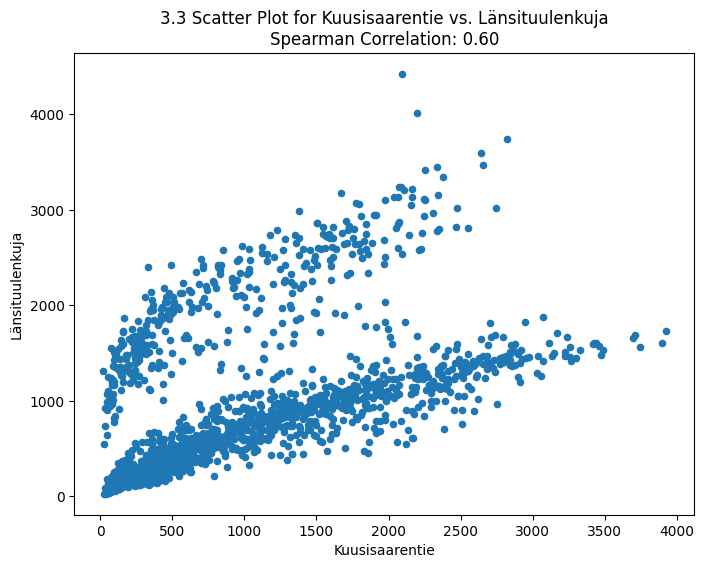

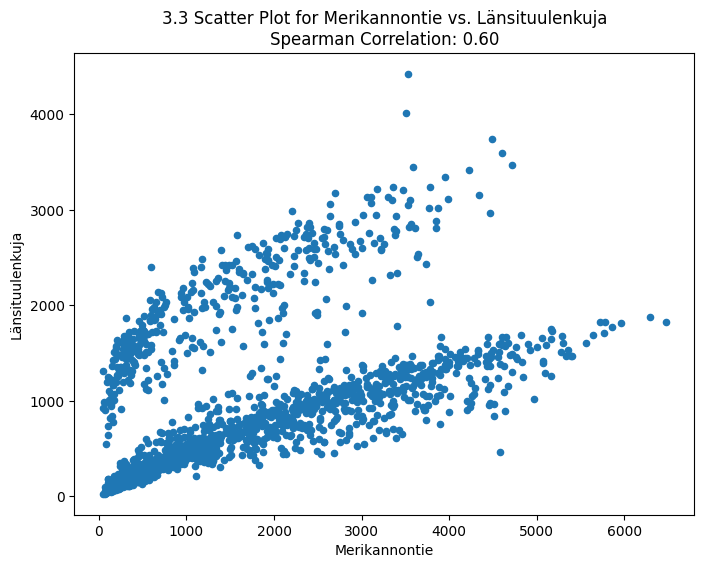

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('53-data.csv', delimiter=',')

#3.1
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
means = df.groupby(df['weekday'])[['Eteläesplanadi', 'Kaivokatu', 'Kuusisaarentie', 'Merikannontie', 'Länsituulenkuja']].mean()
ax = means.plot.bar(figsize=(12, 6), width=0.8,stacked=True)

ax.set_title('3.1 Mean Daily Number of Cyclists for Each Street (Grouped by Weekday)')
ax.set_xlabel('Weekday')
ax.set_ylabel('Mean Number of Cyclists')
ax.set_xticklabels(weekday_names, rotation=45)
ax.legend(title='Street Names')

#3.2
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
means = df.groupby(df['month'])[['Eteläesplanadi', 'Kaivokatu', 'Kuusisaarentie', 'Merikannontie', 'Länsituulenkuja']].mean()
ax = means.plot.bar(figsize=(12, 6), width=0.8,stacked=True)

ax.set_title('3.2 Mean Daily Number of Cyclists for Each Street (Grouped by Weekday)')
ax.set_xlabel('Month')
ax.set_ylabel('Mean Number of Cyclists')
ax.set_xticklabels(month_names, rotation=45)
ax.legend(title='Street Names')

#3.3
streets = ['Eteläesplanadi', 'Kaivokatu', 'Kuusisaarentie', 'Merikannontie', 'Länsituulenkuja']

for i in range(len(streets)):
    for j in range(i + 1, len(streets)):
        street1 = streets[i]
        street2 = streets[j]

        spearman_corr = df[[street1, street2]].corr(method='spearman').iloc[0, 1]

        df.plot.scatter(x=street1, y=street2, figsize=(8, 6))
        plt.title(f'3.3 Scatter Plot for {street1} vs. {street2}\nSpearman Correlation: {spearman_corr:.2f}')
        plt.xlabel(street1)
        plt.ylabel(street2)
        plt.show()
